In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from mkidreadoutanalysis.quasiparticletimestream import QuasiparticleTimeStream
from mlcore.eval import plot_stream_data
import random

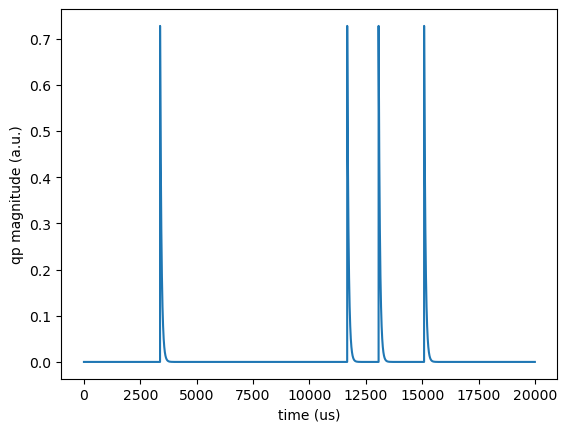

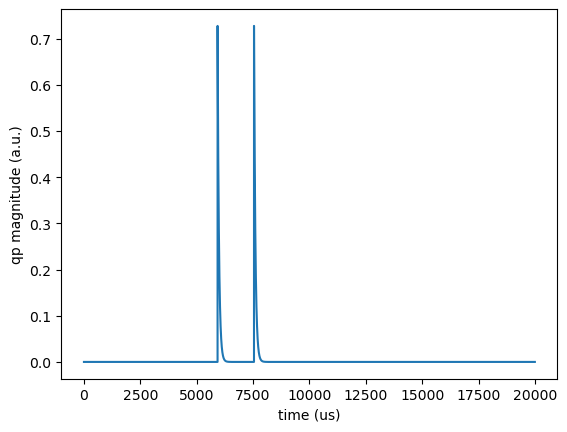

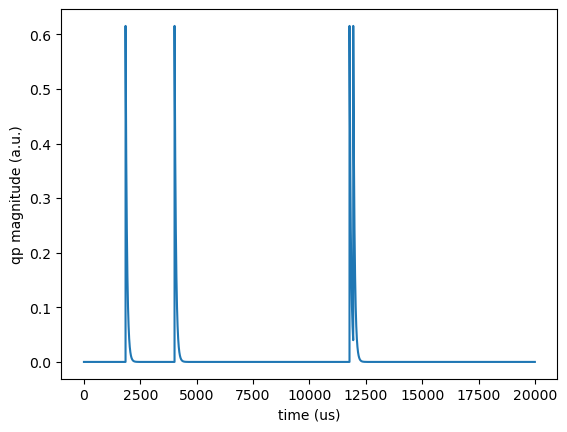

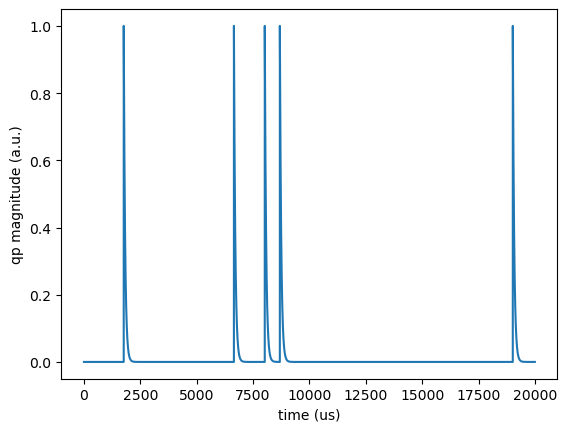

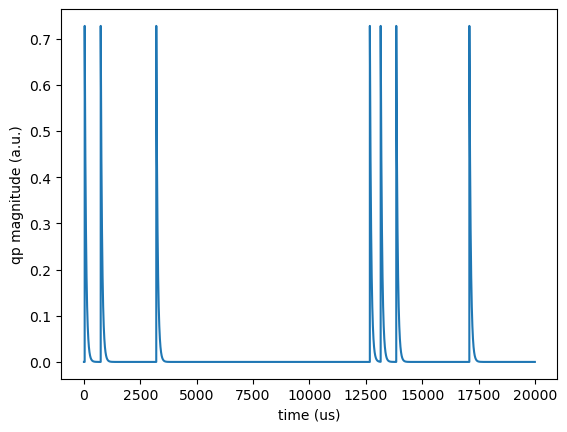

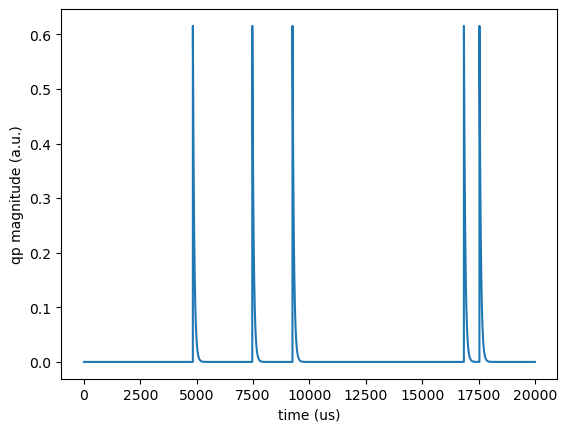

In [2]:
QPT_TIMELEN = 0.01 # Secs
SAMPLING_FREQ = 2e6 # Hz
FALL_TIME = 30 # uSecs
NUM_SAMPLES = 100
WINDOW_SIZE = 1000
EDGE_PAD = 60
RANDOM_SEED = 42


qpt = QuasiparticleTimeStream(SAMPLING_FREQ, QPT_TIMELEN)

# We want to modulate the magnitude of the qp density for each iteration
# We will naively make a list of magnitudes (modeling Samantha's code) and reference it to the lowest magnitude
mags = [mag for mag in range(800, 1400, 100)]

for _ in range(len(mags)):
    qpt.gen_quasiparticle_pulse(magnitude= min(mags)/random.choice(mags))
    qpt.gen_photon_arrivals(seed=None)
    qpt.populate_photons()

    plt.figure()
    plt.plot(np.arange(qpt.data.size), qpt.data)
    plt.xlabel('time (us)')
    plt.ylabel('qp magnitude (a.u.)')


In [3]:
# Lets load the new training data with the add qp density and visualize everything.
data_dir = '../../../../data/pulses/single_pulse/'
pulse_list = np.load(data_dir + f'vp_single_num{NUM_SAMPLES}_win{WINDOW_SIZE}_pad{EDGE_PAD}.npz')
pulses = list(pulse_list['pulses'])


In [4]:
pulses[0].shape

(4, 1000)

Pulse Height: 0.6153846153846154


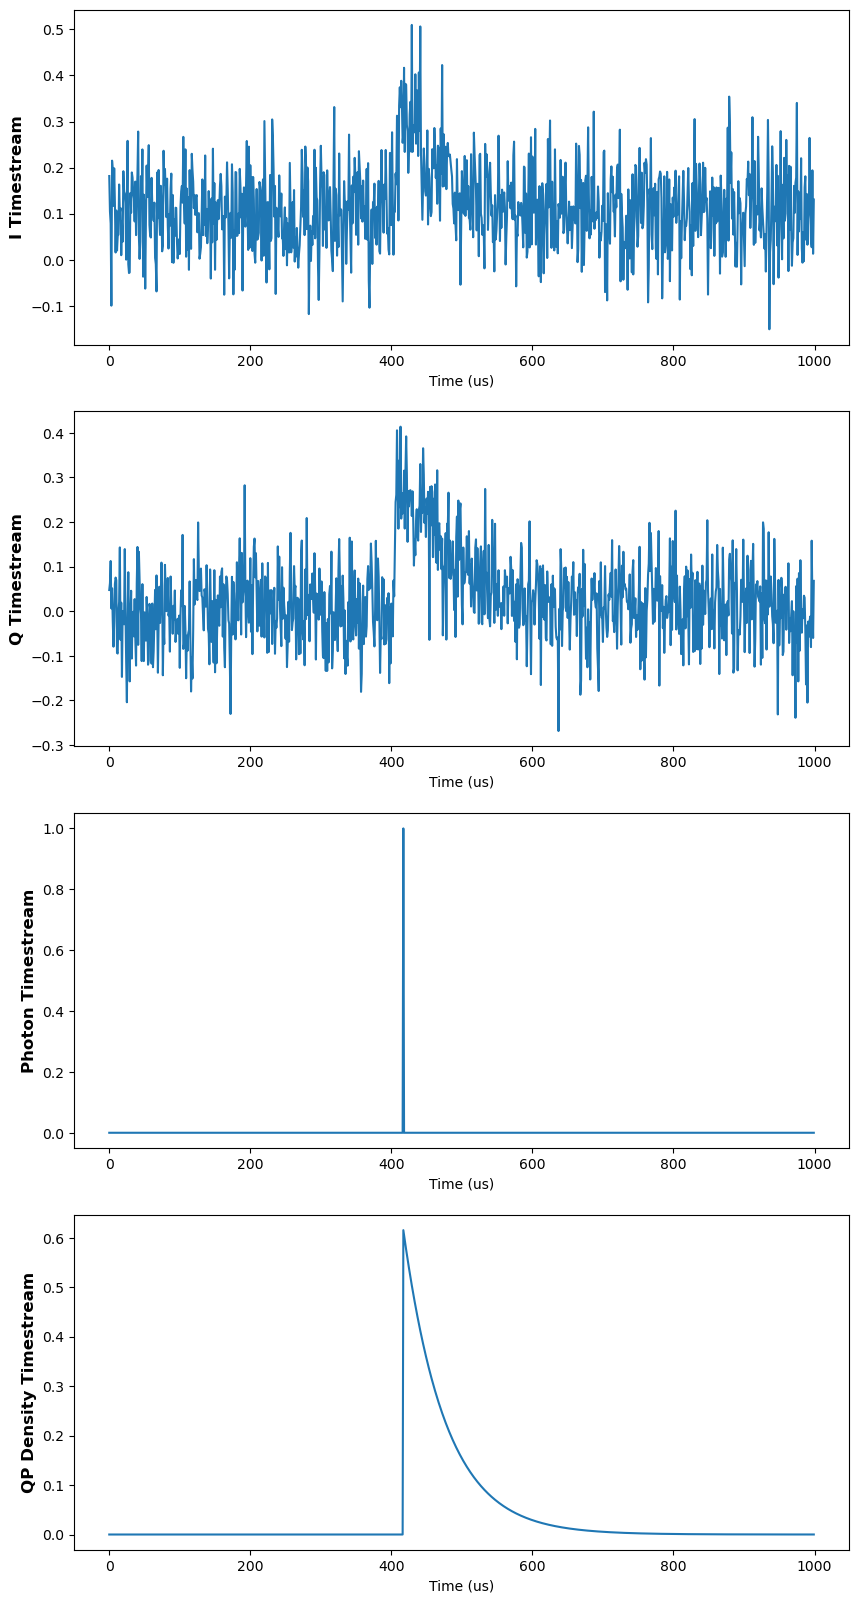

Pulse Height: 0.7272727272727273


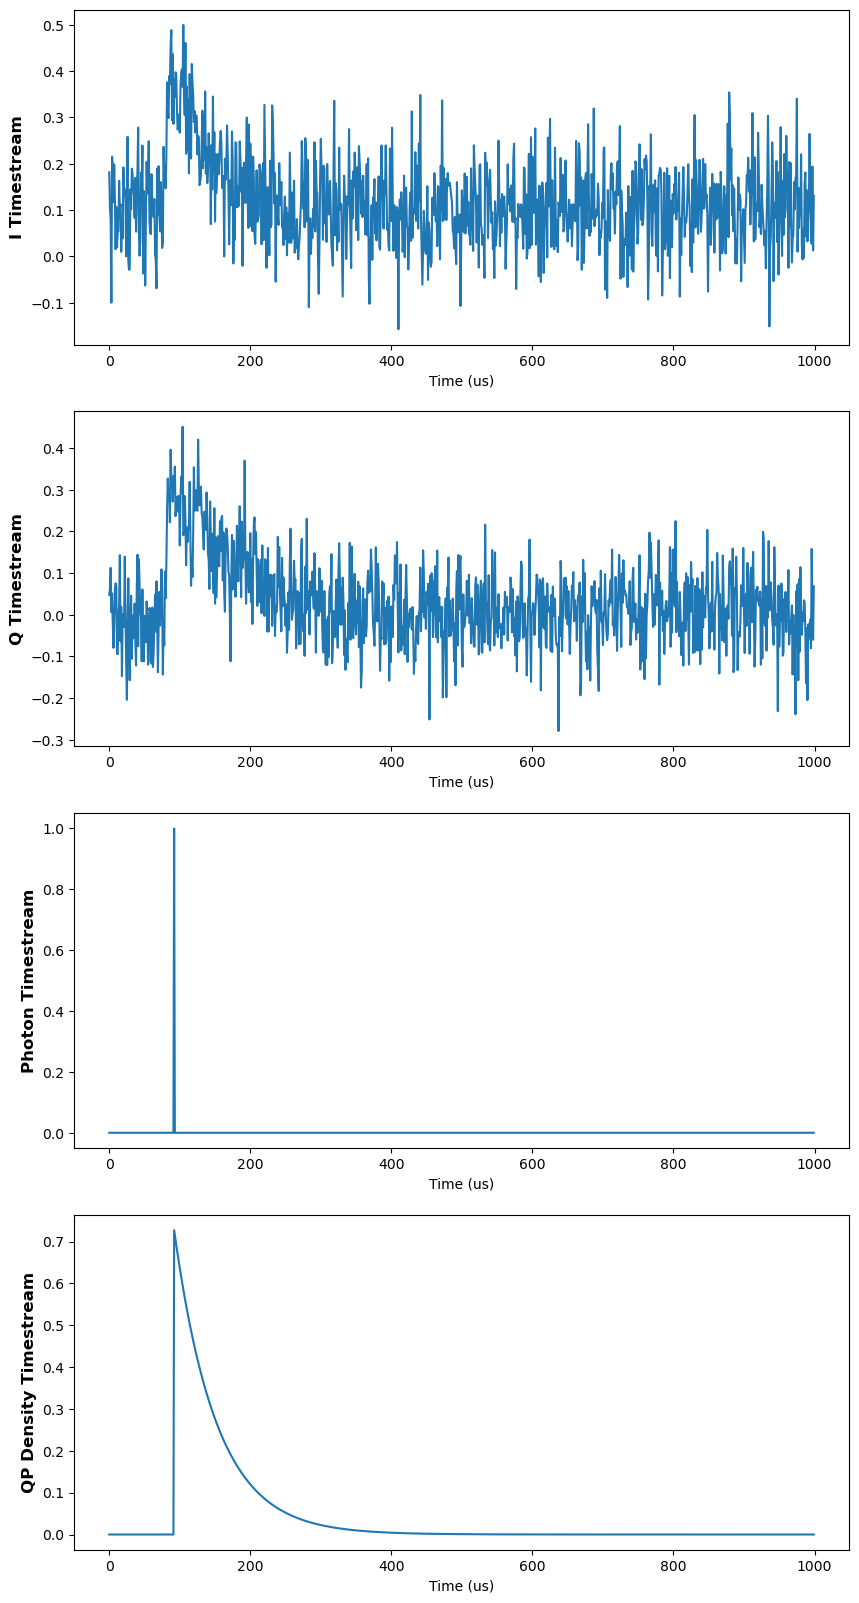

Pulse Height: 0.6153846153846154


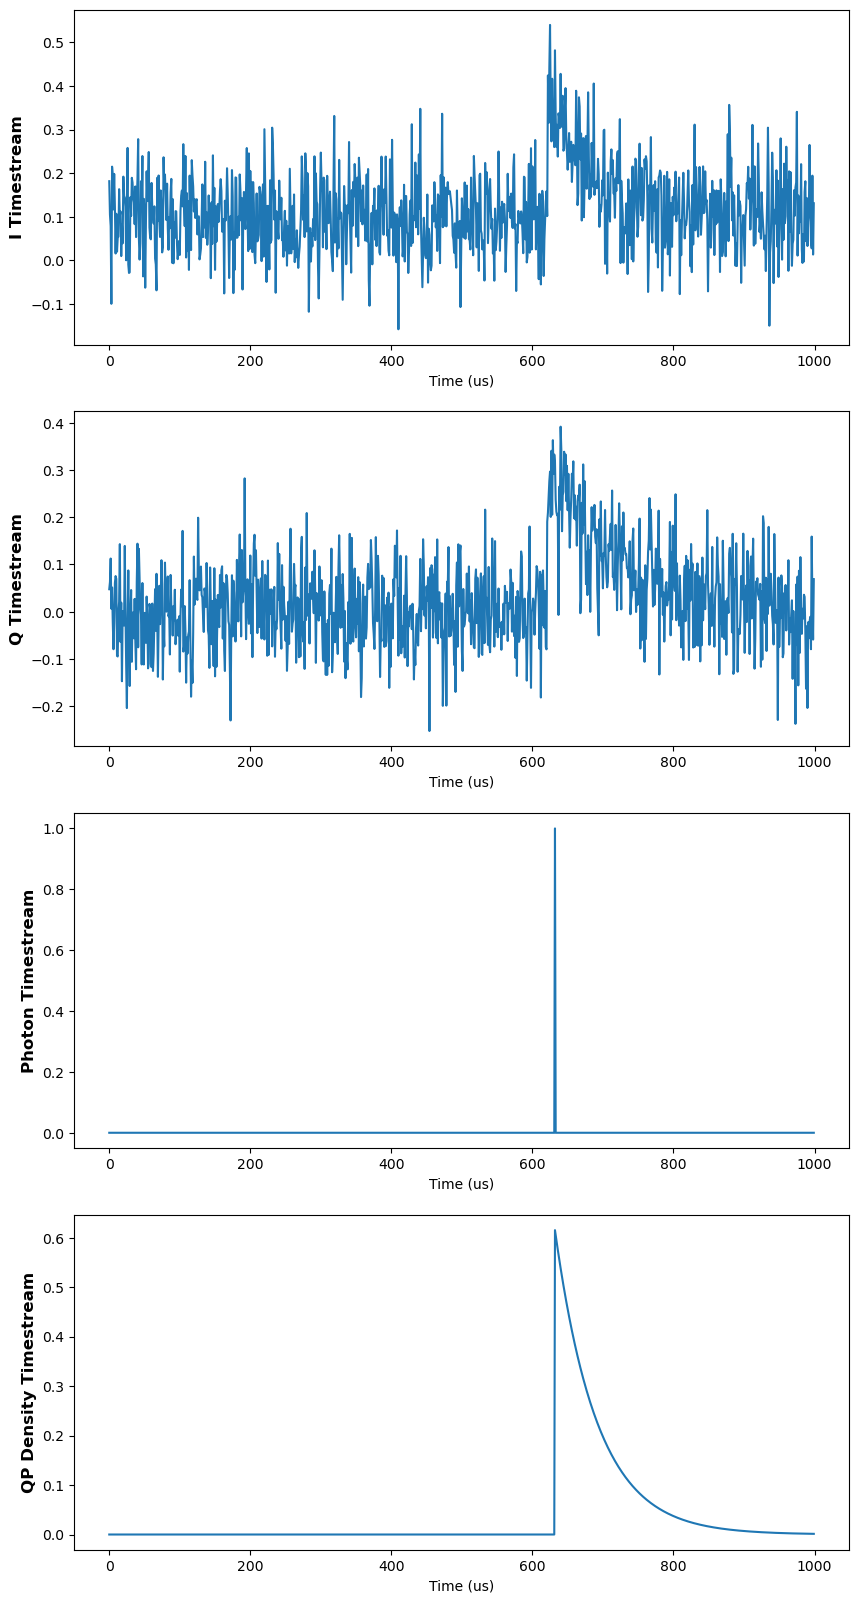

Pulse Height: 0.6153846153846154


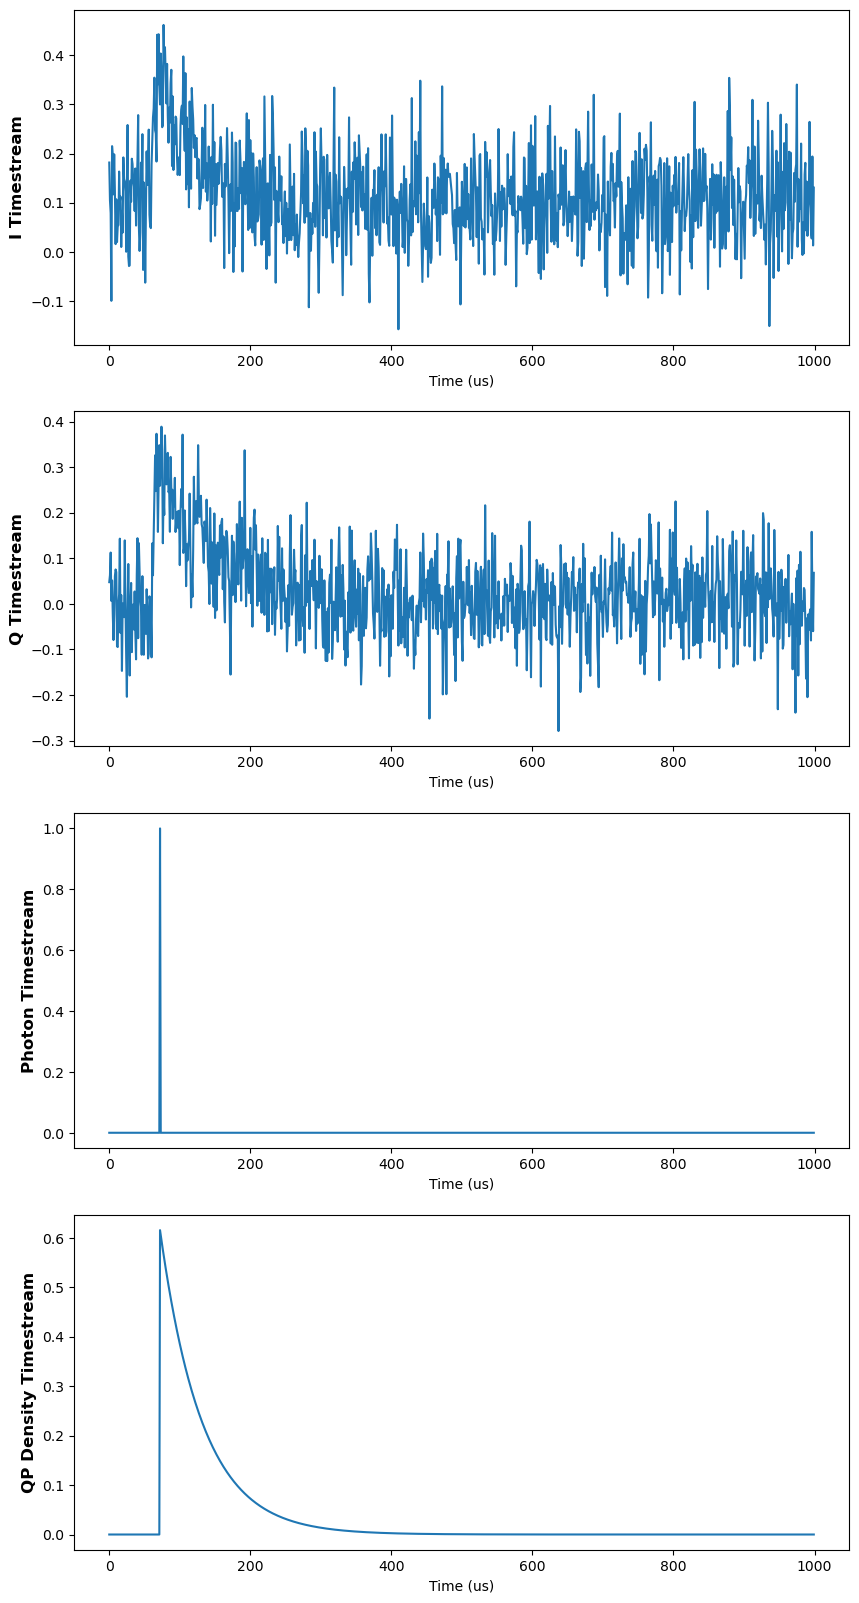

Pulse Height: 0.8888888888888888


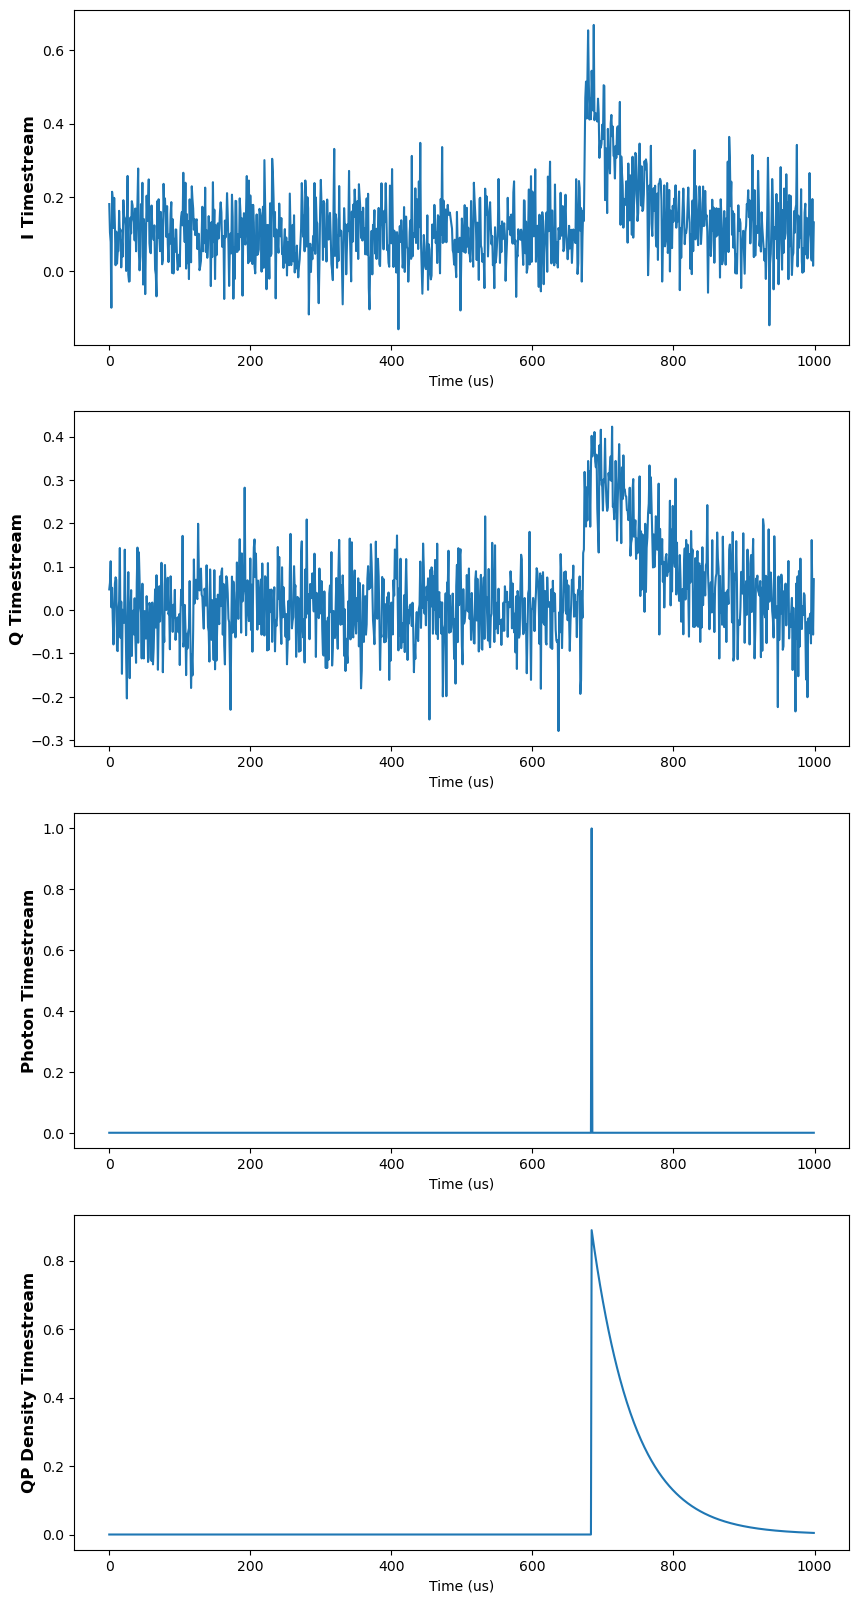

In [5]:
for ind in range(5):
    print(f'Pulse Height: {pulses[ind][3].max()}')
    plot_stream_data(pulses[ind][0],
                     pulses[ind][1],
                     pulses[ind][2],
                     pulses[ind][3],
                     units='us')

In [16]:
X, y = [], []
element = pulses[0]
X.append(element[0:2,:])
arr_time = np.argwhere(element[2] == 1).item()
pulse_height = element[3][arr_time].item()
y.append(torch.tensor((arr_time / 1000, pulse_height)).reshape(1,2))

In [7]:
X[0]

array([[ 0.18166503,  0.10493272,  0.0787386 , ...,  0.19399596,
         0.01299695,  0.13070609],
       [ 0.04758517,  0.06286171,  0.11257087, ...,  0.02154091,
        -0.05988416,  0.06806934]])

In [18]:
print(y[0])
print(y[0].shape)

tensor([[0.4170, 0.6154]])
torch.Size([1, 2])


In [9]:
pulses[0][3].max()

0.6153846153846154

In [10]:
loss = torch.nn.L1Loss(reduction='sum')
y_pred = torch.tensor([1, 0.5])
y = torch.tensor([0.5, 1])

In [11]:
loss(y_pred, y).item()

1.0

In [12]:
testa = torch.tensor([1,2,3,4,5,6], dtype=float).reshape(3,1,2)
testb = 0.75 * torch.ones(6).reshape(3,1,2)

In [13]:
print(testa)
print(testb)
print(testa - testb)

tensor([[[1., 2.]],

        [[3., 4.]],

        [[5., 6.]]], dtype=torch.float64)
tensor([[[0.7500, 0.7500]],

        [[0.7500, 0.7500]],

        [[0.7500, 0.7500]]])
tensor([[[0.2500, 1.2500]],

        [[2.2500, 3.2500]],

        [[4.2500, 5.2500]]], dtype=torch.float64)


In [14]:
torch.mean(testa, 0)

tensor([[3., 4.]], dtype=torch.float64)

In [15]:
testa.mean(dim=0)

tensor([[3., 4.]], dtype=torch.float64)